Image Classification using Military Aircraft Dataset

Loading & Verifying data

In [1]:
import zipfile

In [2]:
zip_path = "/home/deepaksr/project/project_assignment1/acdata.zip"
folder_path = "/home/deepaksr/project/project_assignment1/data2"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(folder_path)
    
print(f"Data extracted to {folder_path}")

Data extracted to /home/deepaksr/project/project_assignment1/data2


In [2]:
import os

In [3]:
train_path='/home/deepaksr/project/project_assignment1/data2/data2/train'
valid_path='/home/deepaksr/project/project_assignment1/data2/data2/valid'
test_path='/home/deepaksr/project/project_assignment1/data2/data2/test'
def verify_data(folder):
  for classes in os.listdir(folder):
    class_path=os.path.join(folder,classes)
    if os.path.isdir(class_path):
      images = [i for i in os.listdir(class_path) if os.path.isfile(os.path.join(class_path,i))]
      counter = sum(1 for image in images if image.lower().endswith('.jpg'))
      print(f'class: {classes}')
      print(f'Images: {counter}\n')

print('Training Data:')
verify_data(train_path)
print('Validation Data:')
verify_data(valid_path)
print('Test Data:')
verify_data(test_path)

Training Data:
class: C390
Images: 60

class: KJ600
Images: 30

class: F117
Images: 304

class: J10
Images: 548

class: U2
Images: 272

class: C17
Images: 523

class: E7
Images: 153

class: A400M
Images: 383

class: A10
Images: 578

class: US2
Images: 546

class: Mirage2000
Images: 413

class: F16
Images: 1489

class: F14
Images: 435

class: KC135
Images: 209

class: J20
Images: 606

class: B2
Images: 426

class: XB70
Images: 151

class: Su57
Images: 303

class: JAS39
Images: 482

class: KF21
Images: 85

class: Su24
Images: 284

class: C5
Images: 303

class: WZ7
Images: 70

class: YF23
Images: 118

class: Be200
Images: 220

class: An72
Images: 70

class: P3
Images: 278

class: F35
Images: 1136

class: B21
Images: 20

class: F18
Images: 1402

class: JF17
Images: 149

class: MQ9
Images: 306

class: Tu95
Images: 293

class: Tornado
Images: 398

class: AV8B
Images: 372

class: B52
Images: 460

class: F4
Images: 566

class: F15
Images: 1281

class: TB2
Images: 340

class: AG600
Images: 182


Data Augmentation using ImageDataGenerator & Data Generator using flow_from_directory 
(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory)

In [4]:
import keras # type: ignore
import tensorflow as tf # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

2024-09-02 17:26:22.230664: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 17:26:22.254556: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-02 17:26:22.261548: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-02 17:26:22.278102: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-02 17:26:23.295262: W tensorflow/comp

In [5]:
datagen= ImageDataGenerator(rotation_range=10,width_shift_range=0.05,height_shift_range=0.05,
                            horizontal_flip=True, rescale=1.0/255)
train_generator = datagen.flow_from_directory(directory=train_path,
                                            target_size=(300,300),
                                            class_mode='categorical',
                                            batch_size=32,
                                            shuffle=True)
val_generator = datagen.flow_from_directory(directory=valid_path,
                                            target_size=(300,300),
                                            class_mode='categorical',
                                            batch_size=32,
                                            shuffle=True)
test_generator = datagen.flow_from_directory(directory=test_path,
                                            target_size=(300,300),
                                            class_mode='categorical',
                                            batch_size=32,
                                            shuffle=False)

print(train_generator.class_indices)
print(train_generator.samples)
print(val_generator.class_indices)
print(val_generator.samples)
print(test_generator.class_indices)
print(test_generator.samples)

Found 24383 images belonging to 60 classes.
Found 2175 images belonging to 60 classes.
Found 1006 images belonging to 60 classes.
{'A10': 0, 'A400M': 1, 'AG600': 2, 'AV8B': 3, 'An72': 4, 'B1': 5, 'B2': 6, 'B21': 7, 'B52': 8, 'Be200': 9, 'C130': 10, 'C17': 11, 'C2': 12, 'C390': 13, 'C5': 14, 'E2': 15, 'E7': 16, 'EF2000': 17, 'F117': 18, 'F14': 19, 'F15': 20, 'F16': 21, 'F18': 22, 'F22': 23, 'F35': 24, 'F4': 25, 'H6': 26, 'J10': 27, 'J20': 28, 'JAS39': 29, 'JF17': 30, 'JH7': 31, 'KC135': 32, 'KF21': 33, 'KJ600': 34, 'MQ9': 35, 'Mig31': 36, 'Mirage2000': 37, 'P3': 38, 'RQ4': 39, 'Rafale': 40, 'SR71': 41, 'Su24': 42, 'Su25': 43, 'Su34': 44, 'Su57': 45, 'TB001': 46, 'TB2': 47, 'Tornado': 48, 'Tu160': 49, 'Tu22M': 50, 'Tu95': 51, 'U2': 52, 'US2': 53, 'V22': 54, 'Vulcan': 55, 'WZ7': 56, 'XB70': 57, 'Y20': 58, 'YF23': 59}
24383
{'A10': 0, 'A400M': 1, 'AG600': 2, 'AV8B': 3, 'An72': 4, 'B1': 5, 'B2': 6, 'B21': 7, 'B52': 8, 'Be200': 9, 'C130': 10, 'C17': 11, 'C2': 12, 'C390': 13, 'C5': 14, 'E2': 

In [9]:
x_train_batch, y_train_batch = next(train_generator)
x_valid_batch, y_valid_batch = next(val_generator)
x_test_batch, y_test_batch = next(test_generator)

print(f"Training batch shape: {x_train_batch.shape}, Labels shape: {y_train_batch.shape}")
print(f"Validation batch shape: {x_valid_batch.shape}, Labels shape: {y_valid_batch.shape}")
print(f"Test batch shape: {x_test_batch.shape}, Labels shape: {y_test_batch.shape}")

Training batch shape: (32, 300, 300, 3), Labels shape: (32, 60)
Validation batch shape: (32, 300, 300, 3), Labels shape: (32, 60)
Test batch shape: (32, 300, 300, 3), Labels shape: (32, 60)


Define the CNN using keras.models & keras.layers

In [6]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.utils import plot_model # type: ignore

In [7]:
def get_model():
  net = Sequential()
  net.add(Conv2D(32,(3,3), activation = 'relu', padding='same', input_shape=(300,300,3)))
  net.add(MaxPooling2D((2,2)))
  net.add(Conv2D(128,(3,3), activation='relu', padding='same'))
  net.add(MaxPooling2D((2,2)))
  net.add(Dropout(0.25))
  net.add(Flatten())
  net.add(Dense(512, activation='relu'))
  net.add(Dense(256, activation='relu'))
  net.add(Dropout(0.25))
  net.add(Dense(60, activation='softmax'))
  net.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
  return net

Plotting & visualising the Network

In [8]:
model=get_model()
model.summary()

/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-02 17:26:30.445459: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9798 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:18:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 300, 300, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 720000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   368,640,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 60)             │        15,420 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 368,825,148 (1.37 GB)

 Trainable params: 368,825,148 (1.37 GB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(train_generator, validation_data=val_generator, epochs=25)

Epoch 1/25


/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725200829.982190 2304907 service.cc:146] XLA service 0x7fa47c00c6e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725200829.982266 2304907 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-09-01 19:57:10.036346: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-01 19:57:10.316169: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907

  1/762 ━━━━━━━━━━━━━━━━━━━━ 3:08:32 15s/step - accuracy: 0.0000e+00 - loss: 4.0787

I0000 00:00:1725200836.469282 2304907 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 89/762 ━━━━━━━━━━━━━━━━━━━━ 7:48 695ms/step - accuracy: 0.0408 - loss: 9.5907

2024-09-01 19:58:19.583703: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.98GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-09-01 19:58:20.123213: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.79GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-09-01 19:58:22.685918: W external/local_xla/xla/service/hlo_rematerialization.cc:3005] Can't reduce memory use below 4.23GiB (4538839797 bytes) by rematerialization; only reduced to 5.64GiB (6055512272 bytes), down from 6.07GiB (6513377568 bytes) originally


762/762 ━━━━━━━━━━━━━━━━━━━━ 580s 742ms/step - accuracy: 0.0555 - loss: 4.9479 - val_accuracy: 0.0460 - val_loss: 3.8946
Epoch 2/25
762/762 ━━━━━━━━━━━━━━━━━━━━ 550s 715ms/step - accuracy: 0.0770 - loss: 3.7271 - val_accuracy: 0.0975 - val_loss: 3.6653
Epoch 3/25
762/762 ━━━━━━━━━━━━━━━━━━━━ 550s 716ms/step - accuracy: 0.1327 - loss: 3.4908 - val_accuracy: 0.1034 - val_loss: 3.6220
Epoch 4/25
762/762 ━━━━━━━━━━━━━━━━━━━━ 547s 711ms/step - accuracy: 0.1625 - loss: 3.3461 - val_accuracy: 0.1393 - val_loss: 3.5238
Epoch 5/25
762/762 ━━━━━━━━━━━━━━━━━━━━ 548s 714ms/step - accuracy: 0.2085 - loss: 3.1537 - val_accuracy: 0.1752 - val_loss: 3.3263
Epoch 6/25
762/762 ━━━━━━━━━━━━━━━━━━━━ 568s 739ms/step - accuracy: 0.2333 - loss: 3.0304 - val_accuracy: 0.1885 - val_loss: 3.2592
Epoch 7/25
762/762 ━━━━━━━━━━━━━━━━━━━━ 560s 728ms/step - accuracy: 0.2614 - loss: 2.8778 - val_accuracy: 0.2064 - val_loss: 3.2317
Epoch 8/25
762/762 ━━━━━━━━━━━━━━━━━━━━ 572s 744ms/step - accuracy: 0.2785 - loss: 2.79

In [10]:
history_dict = history.history

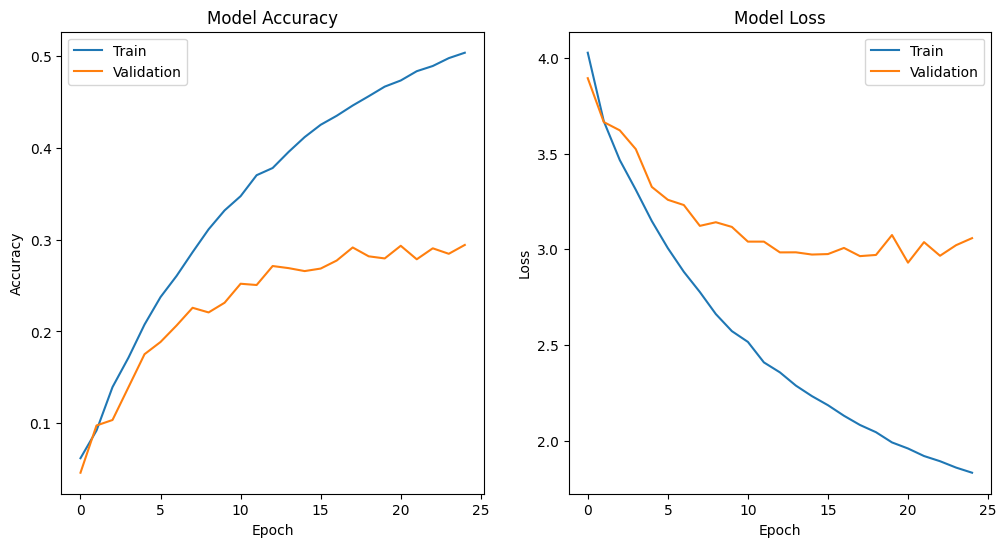

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

Obtaining Predictions for testing & evaluation

In [12]:
import numpy as np
y_pred_prob=model.predict(test_generator)
y_pred=np.argmax(y_pred_prob, axis=1)
print(y_pred)
y_true=test_generator.classes
y_true

/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 726ms/step
[21  0  0 ... 20 50 59]


array([ 0,  0,  0, ..., 59, 59, 59], dtype=int32)

In [13]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report
accuracy = accuracy_score(y_true,y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'Accuracy : {accuracy:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')
print('Classification Report:\n', classification_report(y_true, y_pred,target_names=test_generator.class_indices.keys()))


Accuracy : 0.2803
Precision : 0.3222
Recall : 0.2803
F1 Score : 0.2697
Classification Report:
               precision    recall  f1-score   support

         A10       0.20      0.45      0.28        20
       A400M       0.25      0.05      0.08        20
       AG600       0.86      0.30      0.44        20
        AV8B       0.42      0.40      0.41        20
        An72       0.00      0.00      0.00        10
          B1       0.38      0.30      0.33        20
          B2       0.14      0.15      0.15        20
         B21       0.00      0.00      0.00         4
         B52       0.23      0.25      0.24        20
       Be200       0.50      0.14      0.22        14
        C130       0.21      0.60      0.31        20
         C17       0.18      0.15      0.16        20
          C2       0.45      0.65      0.53        20
        C390       0.00      0.00      0.00         8
          C5       0.25      0.10      0.14        20
          E2       0.42      0.40      0

/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[9 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 6 ... 0 0 0]
 ...
 [0 1 0 ... 1 0 0]
 [1 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [9]:
history = model.fit(train_generator, validation_data=val_generator, epochs=50)

Epoch 1/50


/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725278207.805362 2530938 service.cc:146] XLA service 0x7fdbc8004930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725278207.805465 2530938 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-09-02 17:26:47.869145: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-02 17:26:48.120433: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907

  2/762 ━━━━━━━━━━━━━━━━━━━━ 1:24 112ms/step - accuracy: 0.0000e+00 - loss: 20.1288

I0000 00:00:1725278214.098801 2530938 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


568/762 ━━━━━━━━━━━━━━━━━━━━ 2:17 706ms/step - accuracy: 0.0543 - loss: 5.4084

2024-09-02 17:33:36.427624: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.98GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-09-02 17:33:36.978510: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.79GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-09-02 17:33:39.541120: W external/local_xla/xla/service/hlo_rematerialization.cc:3005] Can't reduce memory use below 4.23GiB (4538839797 bytes) by rematerialization; only reduced to 5.64GiB (6055512272 bytes), down from 6.07GiB (6513377568 bytes) originally


762/762 ━━━━━━━━━━━━━━━━━━━━ 600s 768ms/step - accuracy: 0.0563 - loss: 5.0681 - val_accuracy: 0.0607 - val_loss: 3.8403
Epoch 2/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 566s 736ms/step - accuracy: 0.0958 - loss: 3.6734 - val_accuracy: 0.1126 - val_loss: 3.6549
Epoch 3/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 572s 744ms/step - accuracy: 0.1425 - loss: 3.4487 - val_accuracy: 0.1352 - val_loss: 3.5208
Epoch 4/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 571s 743ms/step - accuracy: 0.1757 - loss: 3.2714 - val_accuracy: 0.1605 - val_loss: 3.3971
Epoch 5/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 572s 744ms/step - accuracy: 0.2190 - loss: 3.0851 - val_accuracy: 0.1880 - val_loss: 3.2890
Epoch 6/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 573s 746ms/step - accuracy: 0.2481 - loss: 2.9256 - val_accuracy: 0.2087 - val_loss: 3.2079
Epoch 7/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 570s 741ms/step - accuracy: 0.2783 - loss: 2.8140 - val_accuracy: 0.1995 - val_loss: 3.2459
Epoch 8/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 570s 741ms/step - accuracy: 0.3071 - loss: 2.68

In [10]:
history_dict = history.history

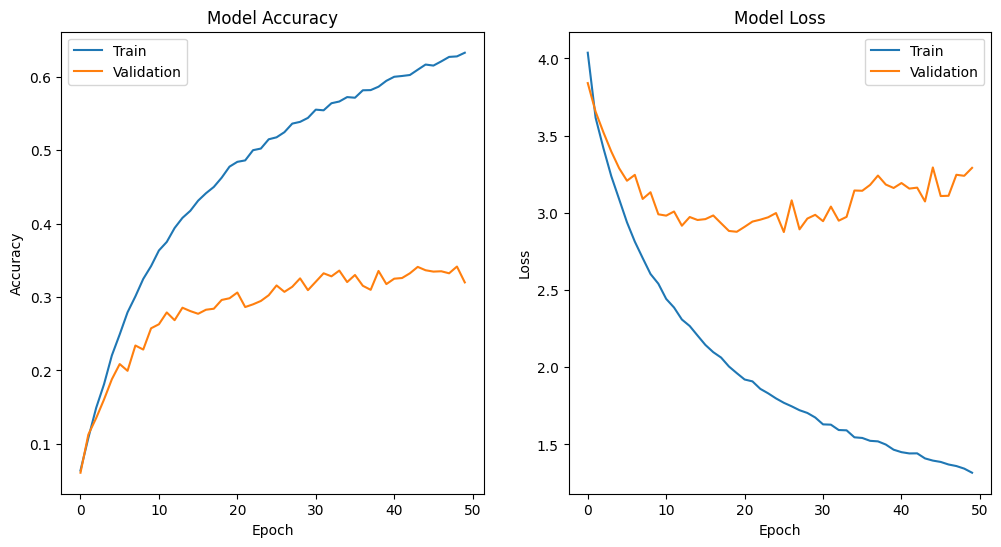

In [11]:
import matplotlib.pyplot as plt # type: ignore

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

Obtaining Predictions for testing & evaluation

In [12]:
import numpy as np # type: ignore
y_pred_prob=model.predict(test_generator)
y_pred=np.argmax(y_pred_prob, axis=1)
print(y_pred)
y_true=test_generator.classes
y_true

/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/32 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step

32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 686ms/step
[24  0  0 ... 24 10  5]


array([ 0,  0,  0, ..., 59, 59, 59], dtype=int32)

In [13]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report # type: ignore
accuracy = accuracy_score(y_true,y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'Accuracy : {accuracy:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')
print('Classification Report:\n', classification_report(y_true, y_pred,target_names=test_generator.class_indices.keys()))


Accuracy : 0.3201
Precision : 0.3650
Recall : 0.3201
F1 Score : 0.3211
Classification Report:
               precision    recall  f1-score   support

         A10       0.33      0.50      0.40        20
       A400M       0.43      0.30      0.35        20
       AG600       0.70      0.35      0.47        20
        AV8B       0.52      0.60      0.56        20
        An72       0.00      0.00      0.00        10
          B1       0.33      0.25      0.29        20
          B2       0.32      0.45      0.38        20
         B21       0.00      0.00      0.00         4
         B52       0.35      0.35      0.35        20
       Be200       0.27      0.29      0.28        14
        C130       0.26      0.45      0.33        20
         C17       0.26      0.25      0.26        20
          C2       0.59      0.80      0.68        20
        C390       0.00      0.00      0.00         8
          C5       0.33      0.25      0.29        20
          E2       0.44      0.35      0

/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [14]:
from sklearn.metrics import confusion_matrix # type: ignore
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[10  0  0 ...  0  0  0]
 [ 0  6  0 ...  1  0  0]
 [ 1  1  7 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  2  1]
 [ 0  0  0 ...  0  0  0]]
